# Programming your own convolutional network

Today's lab will use a common dataset called [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) to let us practice making a convolutional neural network for classification.  This dataset consists of 60,000 32x32 color pictures, each of which map to one of ten classes.  To do this, we'll use Pytorch's built-in CIFAR10 Dataset, so we won't need to program our own.

The two cells below handle imports, and then build the training and testing Datasets.  The first time you run these, it will actually download the data for you.  Notice there are some transformations listed - you're welcome to add to these (and perhaps should), but you'll need at least these, which turn the image file into a Pytorch Image, and then convert them to 32-bit floats.

The end of the second cell prints out the labels, just so we can see it's working.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import v2
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

In [2]:
train_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])
test_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])
trainSet = CIFAR10('.', train=True, transform=train_transforms, download=True)
testSet = CIFAR10('.', train=False, transform=test_transforms)
actuallabels = trainSet.classes
print('Labels are: ',actuallabels)

Files already downloaded and verified
Labels are:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


OK!  Let's make sure that our Datasets are working.  Below I access the first element of the training set, which will give a tuple of the image and the first label (encoded as an integer, which is an index to the class list above).  I then display the first image - we should make sure the label and the image match.

Label is index 9, with semantic name truck


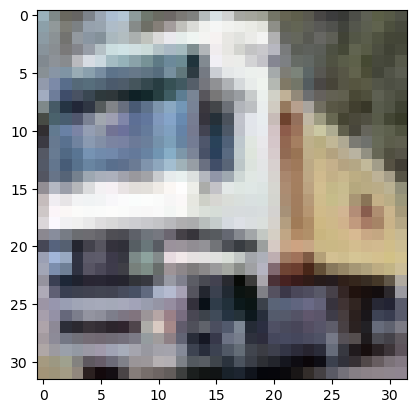

In [4]:
import matplotlib.pyplot as plt
firstimg, firstlabel = trainSet[1]
print(f'Label is index {firstlabel}, with semantic name {actuallabels[firstlabel]}')
plt.imshow(firstimg.permute(1, 2, 0))

Should look OK (though the image is displayed too large, perhaps).  Let's do the same thing with the first testing image.

Label is index 8, with semantic name ship


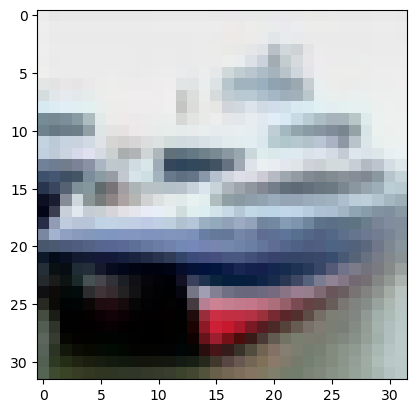

In [5]:
secimg, seclabel = testSet[1]
print(f'Label is index {seclabel}, with semantic name {actuallabels[seclabel]}')
plt.imshow(secimg.permute(1, 2, 0))

Now we build a DataLoader, which will handle pulling out batches for training and testing.

In [ ]:
trainLoader = DataLoader(trainSet, batch_size=100, shuffle=True, num_workers=4)
testLoader = DataLoader(testSet, batch_size=100, shuffle=False, num_workers=4)

You now should have everything you need to start performing your classification.  Build yourself a convolutional network, and train it to do as well as you can.  Create a function which measures accuracy.  Doing a reasonable job on CIFAR10 will give you a 90.

To go further, consider doing the following things:

- Add dataset augmentation, with more interesting transformations on your dataset.
- Do a structured hyperparameter search.  For example, perhaps set up a loop of models to be trained, and at the end of each iteration of the loop, the model is saved to disk along with some notes on the train/test loss values and train/test accuracy values.  This will allow you to go back later and resurrect the one that did the best.
- Scale up to CIFAR100.